### Andrew Egelhof
### KSU  Data Analytics Capstone Class
### GENBA 894


# Investigation of Data Breaches

## Table of Contents
 * Project Overview
 * Dataset Information
 * Data Assessment
 * Exploratory Data Analysis
 * Tasks
     * Part I Business Quesions
     * Part II Statistical  Analysis
     * Part III Unsupervised Machine Learning
     * Part IV Supervised Machine Learning
 * Overall Findings and insights
 * Kansas State Unviersity In The Dataset
 * Personal Reflection
 

## Project Overview

The task given was to analyze the prepared dataset from https://www.privacyrights.org/data-breaches . I downloaded it on 6/4/2018 and it was a CSV file with 9 columns and 8,150 records. The dataset was one of data breaches from all over the world beginning in 2005 a continued through the download dated.  
It was a fairly open-ended assignment with a general outline given give an a few specific questions to be answered.


## Dataset Information


The fields contained within the dataset were:
- <b>"Date Made Public"</b> (Date) The date the breach was made public. Ranging from 1/10/2005 to 6/1/2018.  No null values.
- <b>"Company"</b> (String) The Name of the Company that was breached.  No null values.
- <b>"Location"</b> (String) The location of company. 65 null values.
- <b>"Type of Breach"</b> (String) The acronym of the type of breach.  No null values
    - 7 types of breaches: Payment Card Fraud, Hacking/Malware, Insider, Physical Loss, Portable Device, Stationary Device, Unintended Disclosure, Unknown
- <b>"Type of Organization"</b> (String) the acronym of the organization type. No null values
    - 7 types of organizations: Business Finance/Insurance, Business other, Business Retail/Online, Educational, Government/Military, Healthcare/Medical Insurance, Non-Profit
- <b>"Total Records"</b> (Integer) Number of records compromised. 30 null values and 2191 0's which I believe are unknowns or not disclosed.
    - The range was from 0 - 3 billion with an average of 1743514.199 excluding 0's and nulls.
- <b>"Description of Incident"</b> (String) a description of what happened. 3 null Values
- <b>"Information Source"</b> (String) Where the breach information came from. 54 null values
- <b>"Source URL"</b> (String) The URL of the information source. 5410 null values.
    

## Data Assessment

These are the steps I took to clean the data before exploration and analysis.  For data cleaning I used the Tableau Prep product from Tableau.  

For more details on the data cleaning steps, please see my original notebook at https://github.com/lyte99/KSU-Capstone/blob/master/Data_Cleansing.ipynb

Starting with the Raw datasset I followed these steps: 

1. Remove unneeded fields
    - I remove the "Information Source" and "Source URL" Fields.


2. Recover Missing Locations
    - a. I separated out only the records whose location was Null.  I felt because none of the company names were null I could look them up manually
    - b. I exported those records, I queried Google for the location of the headquarters of the company listed and added it to the location field
    - c. Using the newly created dataset, I merged the data back into the main dataset.  So now I had no more Null values for the location field

    

3. Split out City, State
    - a. Using a comma as a delimiter, I split the location field in two with the newly created City (left side) as one field, and newly created State (right side) as the other
    - b. I then copied the State Field to a second field called "Location2"
    - c. I renamed any null of missing values to "Unknown"
    - d. For the State field, I changed any Non-US data to "Other"

4. Determine Country
    - a. With Location2, I replaced all US states with "USA"
       - b. Changed any Nulls to "Unknown"
       - c. I selected the remaining records which were not USA or Unknown and exported them to a CSV
            - 1. I mapped the remaining locations to a country using my knowledge of world geography and Google
            - 2. I merged the missing values into the dataset
       - d. I renamed the Location2 field to "Country"


5. Split out Date
    - I split the Date field into Day, Month, Year using the forward slash "/" as the delimiter.
    - I changed the newly created fields from strings to Integers


6. Re-organize Breach and Institutional Type
 - For better visualization displays I re-mapped the shorted acronyms to their full names for the "Breach Type" and "Organizational Type"


7. Business Name Cleaning. The business name field was very 'dirty'.  Many of the company names had misspellings or additional information contained in the field so they wouldn't match others even of the same company.
 - a. Remove punctuation
 - b. Trim leading and trailing spaces
 - c. Sort the field ascending
 - d. Replace "Inc" with "" (adding INC to the end was a common problem)
 - e. Export to Excel and manually review names
     - 1. I went through the whole dataset and used my subject knowledge of names of companies and locations to further reduce differences in the same names.  Many had misspellings or no spaces between words or the names of partner companies were commonly included.  I was able to reduce the unique business names from 6716 to 6060.

8. Replace null values in Total Records
 - a. I imported the dataset back in to Prep and I replaced null values in the field with 0's
 - b. I exported the dataset back out in a format fieldly for Tableau.

## Exploratory Data Analysis

I'm used Tableau Desktop for my analysis and visualization. The tableau file used is included in this repository under the Tableau folder.

I chose to focus this analysis around the number of breaches rather than the total records lost.  I feel that a breach is a breach and whether that breach released 1 record or 3 billion, they are both unacceptable whether that be from a government or a commercial entity.   In addition, there were more than 30 null values and 2191 (26.5%) were 0.  It was possible that the entity didn’t know how many records were compromised or that they simple didn’t want to release them but whatever the case, it is difficult to analyze and make accurate models from with so many missing values.

This is a map of the of the united states, showing breaches by state.  The larger the circle on the state the higher the number of breaches it had. The query here was only excluding records whose state was Other or Unknown.  While Hawaii and Alaska did have breaches, the size of their circle was not big enough to warrant zooming out the map to include them.

In [17]:
from IPython.display import Image

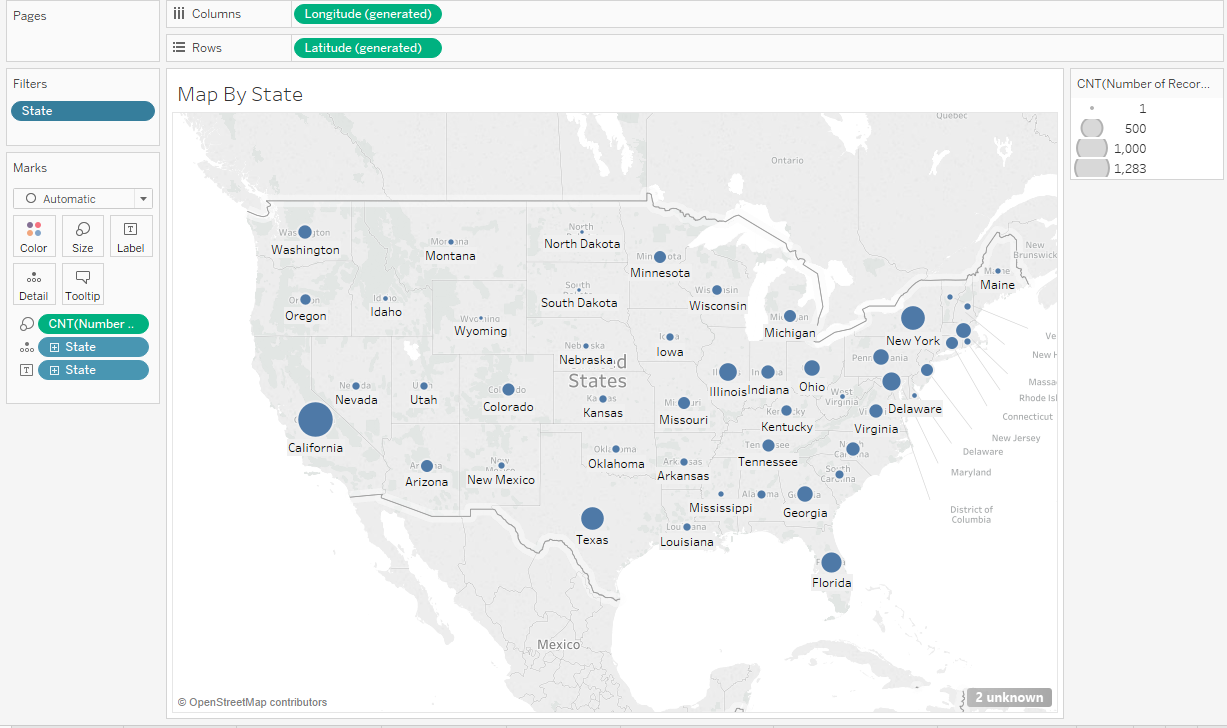

In [18]:
Image("img/viz/Map_Of_States.png")

This is a barchart showing the number of breaches by type of breach. You can see that hacking is the highest following closey by Unintended Disclosure and Physical Loss. I expected credit card to be much higher. 

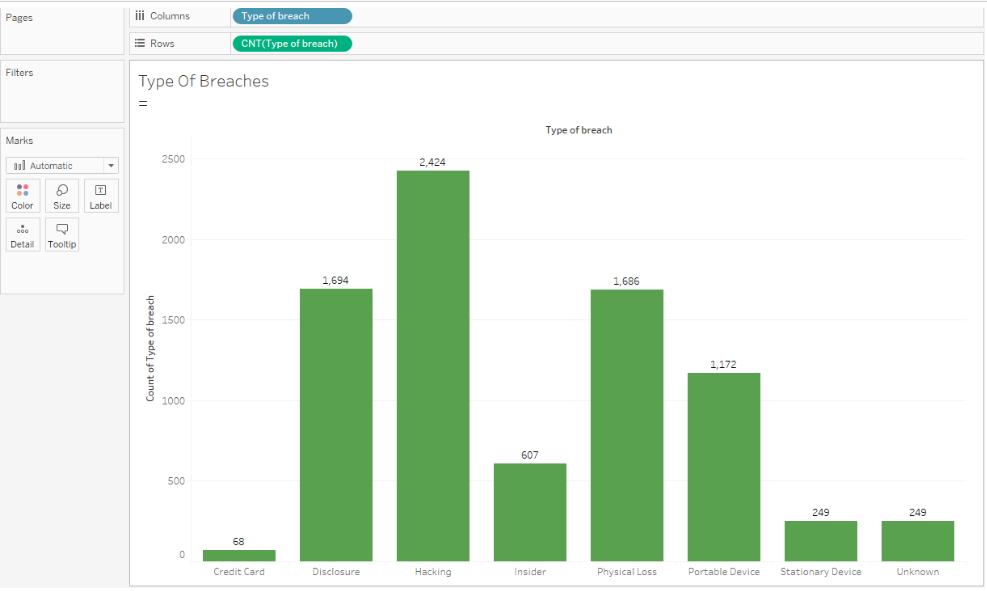

In [19]:
Image("img/viz/Breaches_By_Type_1.png")

This graph shows the number of breaches by organizaiton type.  Medical providers were by almost 4 times higher than any other org. type.  I personally expected that more commerical businesses would have been the highest.  

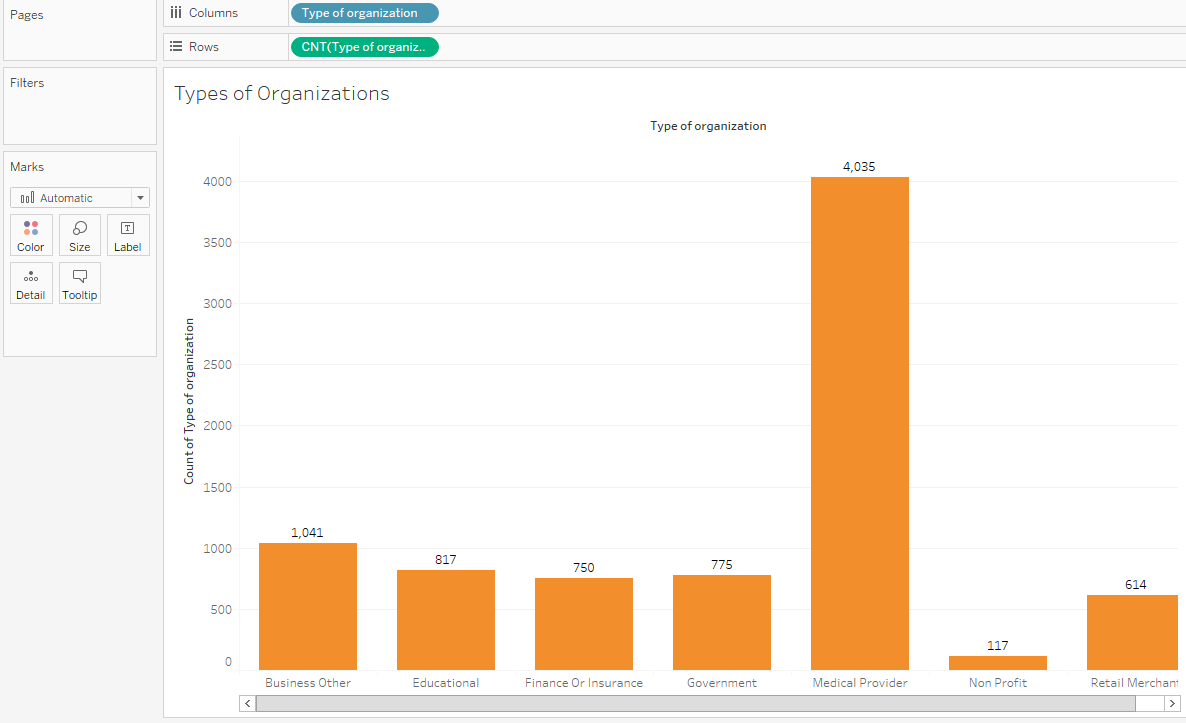

In [20]:
Image("img/viz/Breaches_By_Org.png")

This is breach types by year.  There is a large increase starting in 2010.  I had hoped to see a reduction by 2013 or 2014 as companies became more cyber security conscious but besides 2015 that is not the case. Portable devices have decreased in later years while hacking has increased.  2018 was excluded because the year was not yet complete.

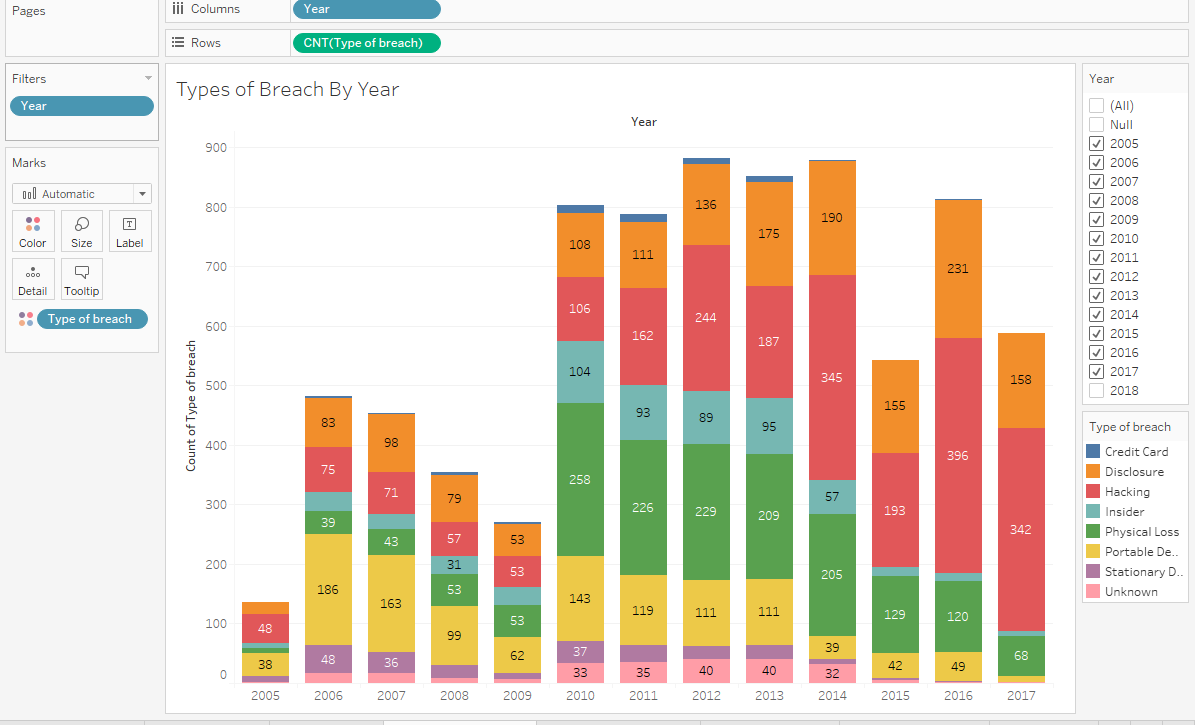

In [21]:
Image("img/viz/Breaches_By_Year_Stacked.png")

This is organizaiton types by year.  Medical providers increased dramatically in 2010 and have been high ever since but governments and educational institutions have decreased in later years. 2018 was excluded because the year was not yet complete.

This shows how each breach type affected each organization type.  Hacking affects the most Business Other types while Physical loss affects medical providers more.

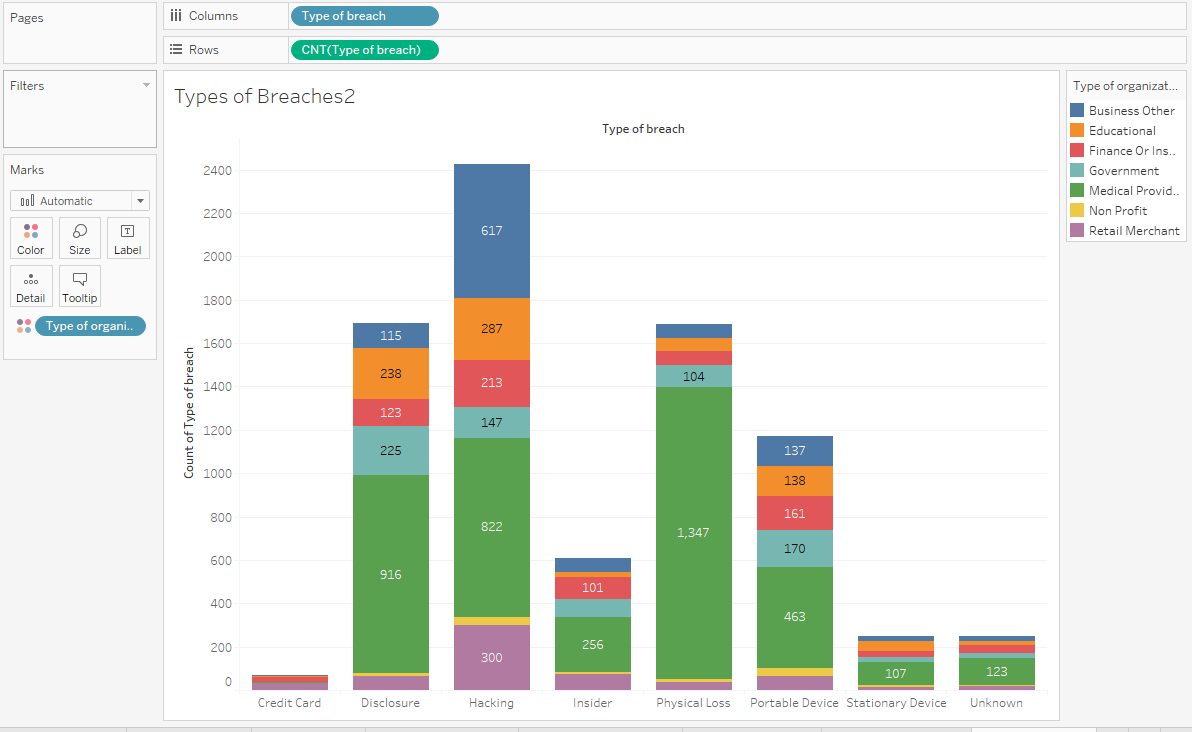

In [22]:
Image("img/viz/Breaches_and_Orgs.png")

## Tasks

### Part I Business Quesions

Additonal details can be found in my original post: https://github.com/lyte99/KSU-Capstone/blob/master/Data_Exploration_Business_Questions.ipynb

1.1 What types of data breaches are more popular than others? Which data breach type is most popular?


Hacking is the most popular followed by Unitended Disclousure 

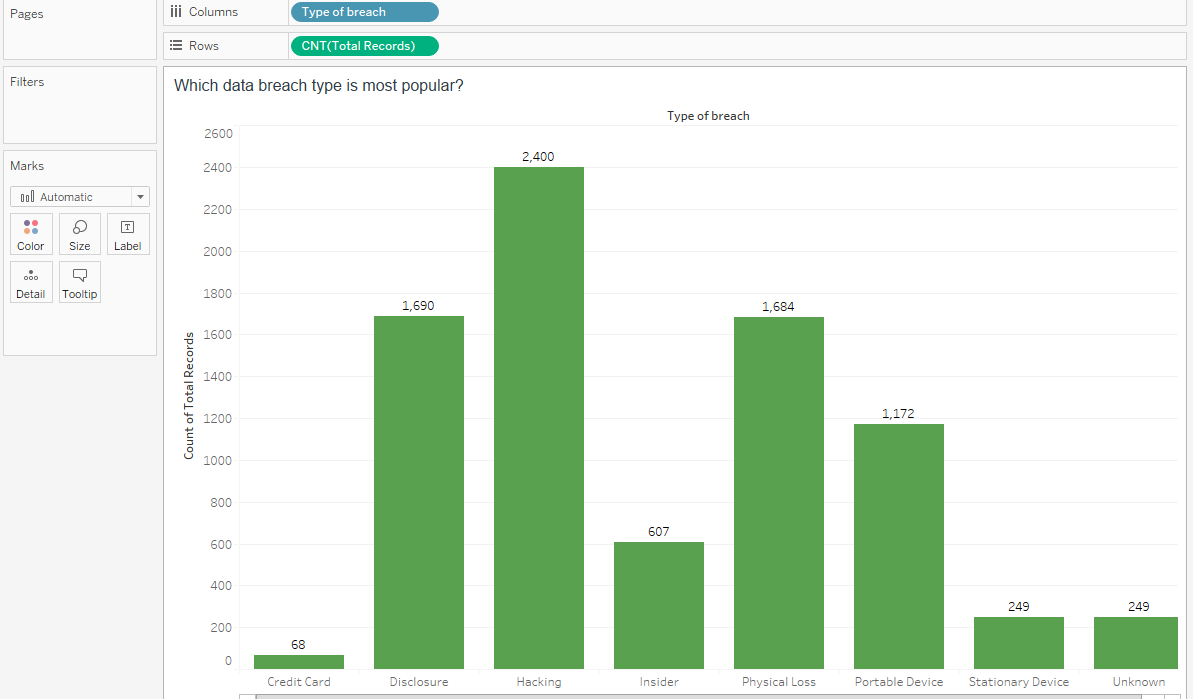

In [23]:
Image("img/viz/Q1.1.png")

1.2 In terms of the number of total records (Hint: each incident causes a different degree of harm to organizations in terms of “Total Records”)

Hacking affected the most records.

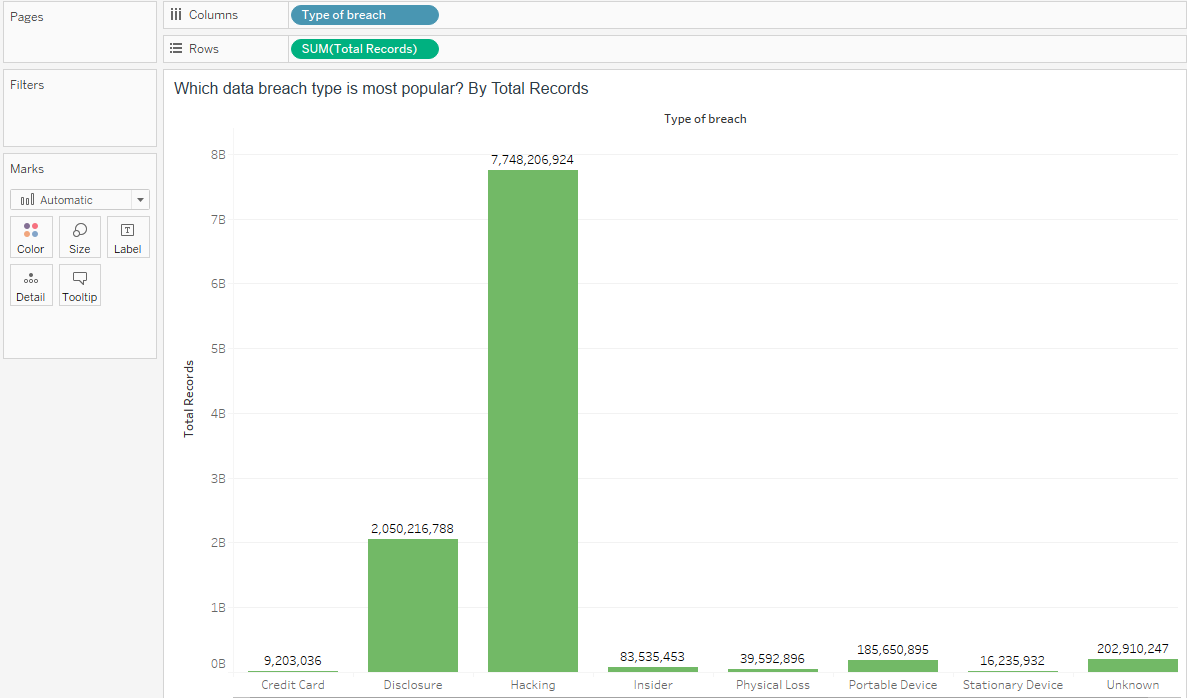

In [24]:
Image("img/viz/Q1.2.png")

1.3 What are the three main causes of data breach?

Hacking, Disclosure and Physical loss

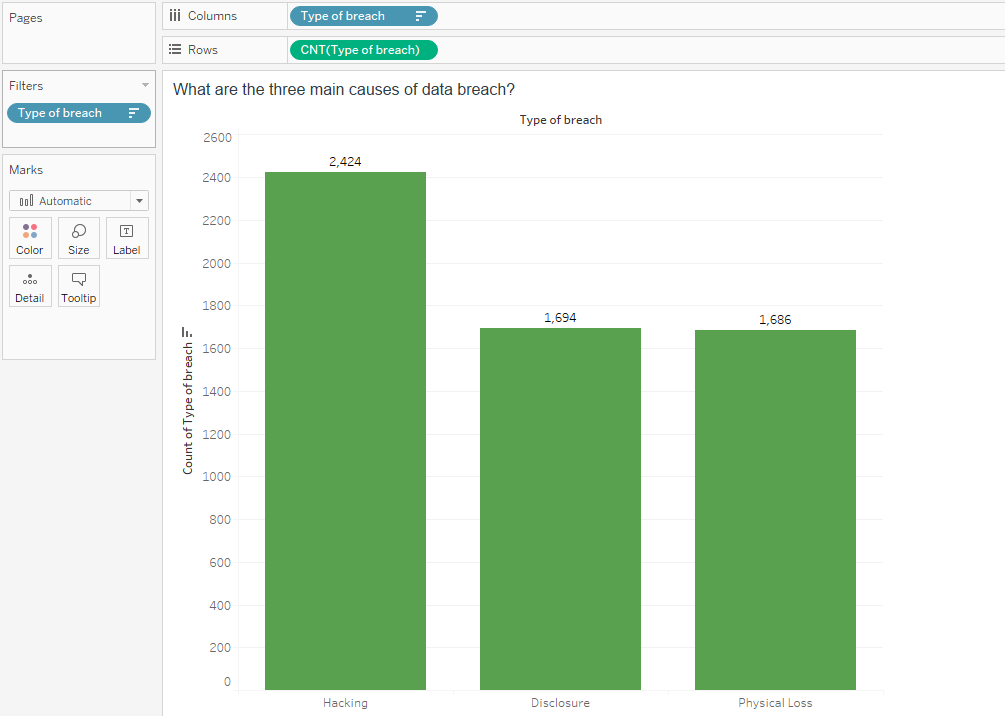

In [25]:
Image("img/viz/Q1.3.png")

2.1 Which organization type has the highest number of data breaches? In terms of the number of incidents.

Medical Provider

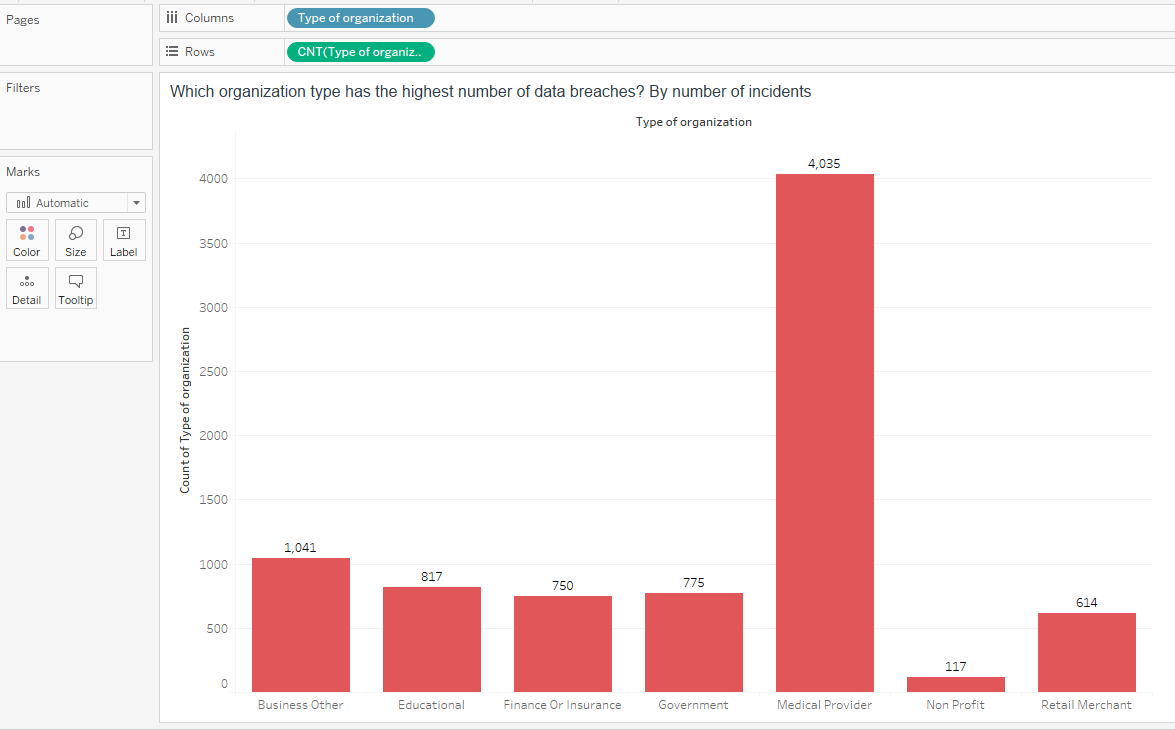

In [26]:
Image("img/viz/Q2.1.png")

2.2 Which organization type has the highest number of data breaches? In terms of the number of total records

Business Other

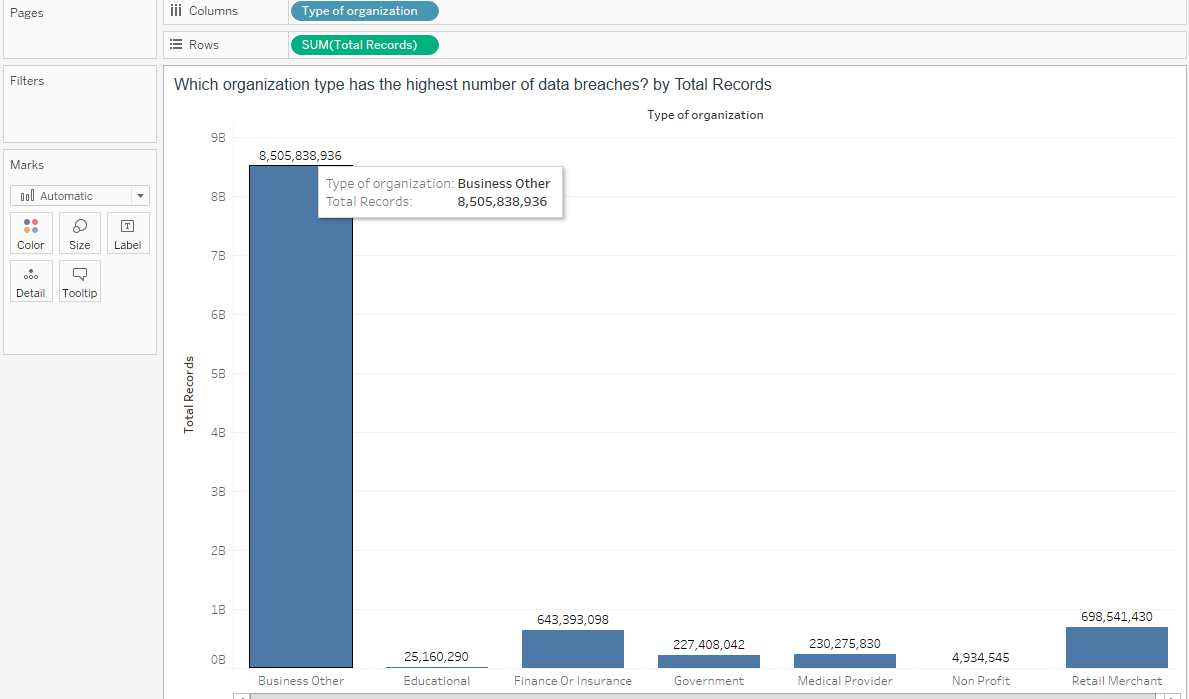

In [27]:
Image("img/viz/Q2.2.png")

2.3 Which organization types appear to be the target of data breaches?

Medical Providers, Business Other, Educational

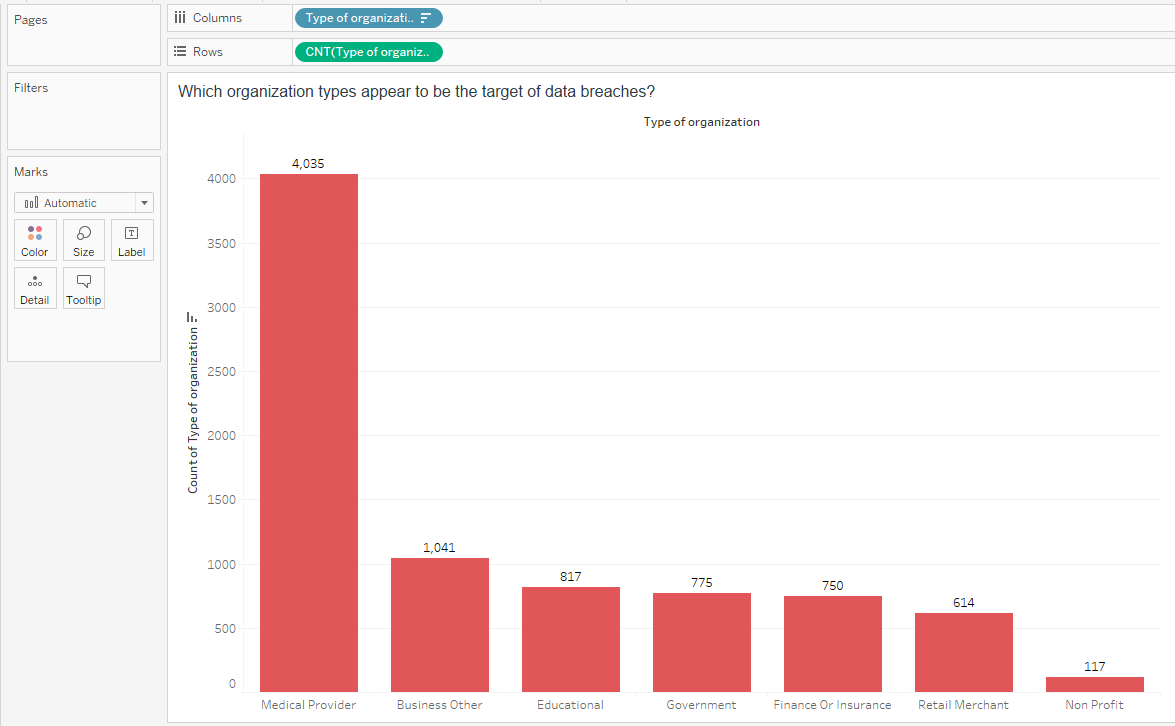

In [28]:
Image("img/viz/Q2.3.png")

3.1 Which states are more likely to have data breaches?

California, New York, Texas

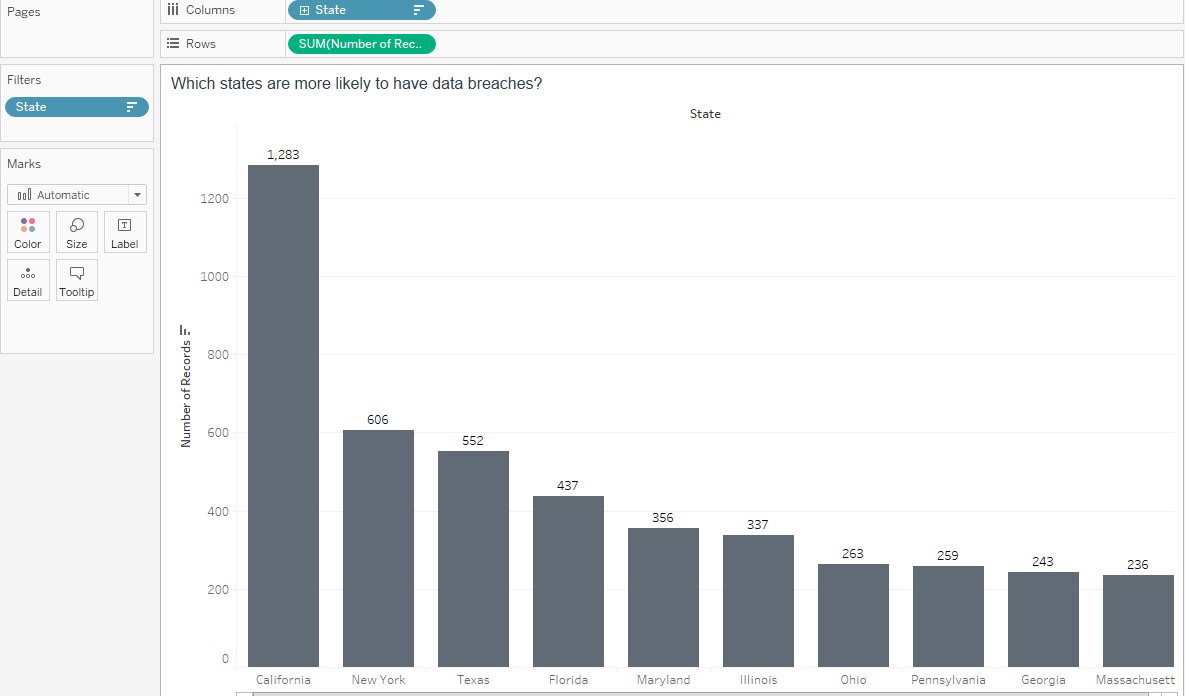

In [29]:
Image("img/viz/Q3.1.png")

3.2 Which US states are less likely to have data breaches?

North Dakota, South Dakota, Wyoming

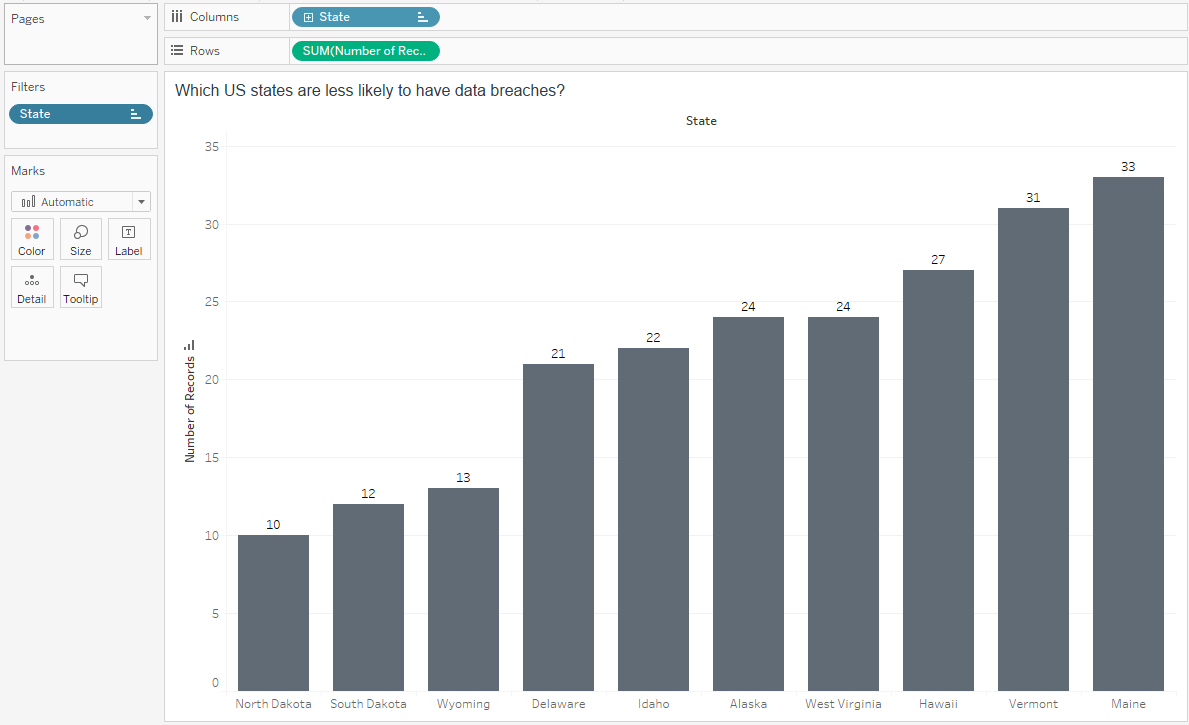

In [30]:
Image("img/viz/Q3.2.png")

3.3 What are the top three states in terms of the number of data breaches in 2017?

California, New York, Texas

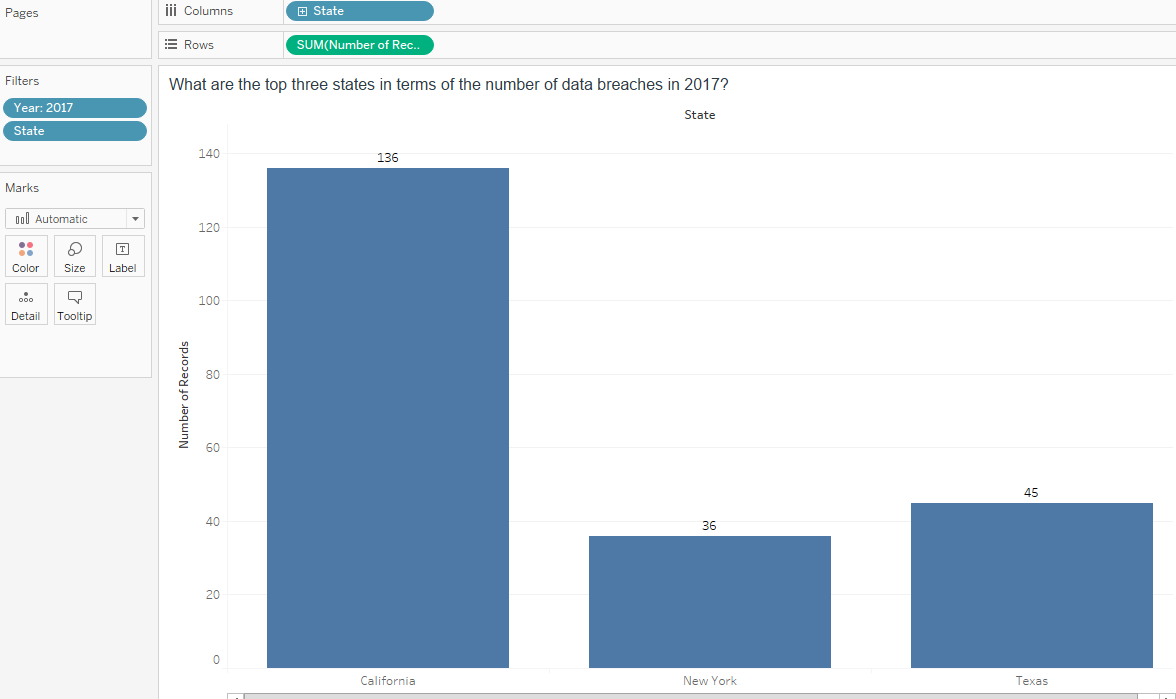

In [31]:
Image("img/viz/Q3.3.png")

4.1 Which organization type is more vulnerable to “Hackers”?

Medical Provider

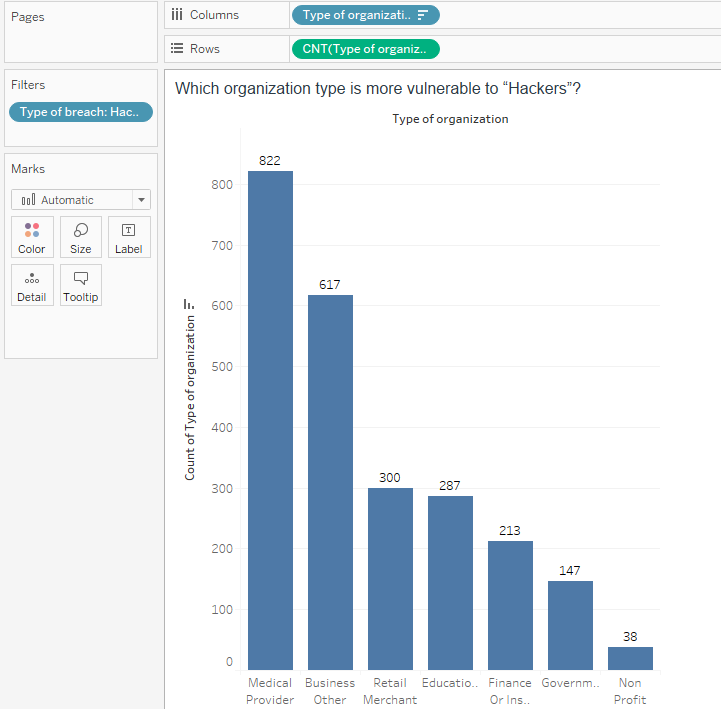

In [32]:
Image("img/viz/Q4.1.png")

4.2 What is the most popular data breach type for education?

Hacking

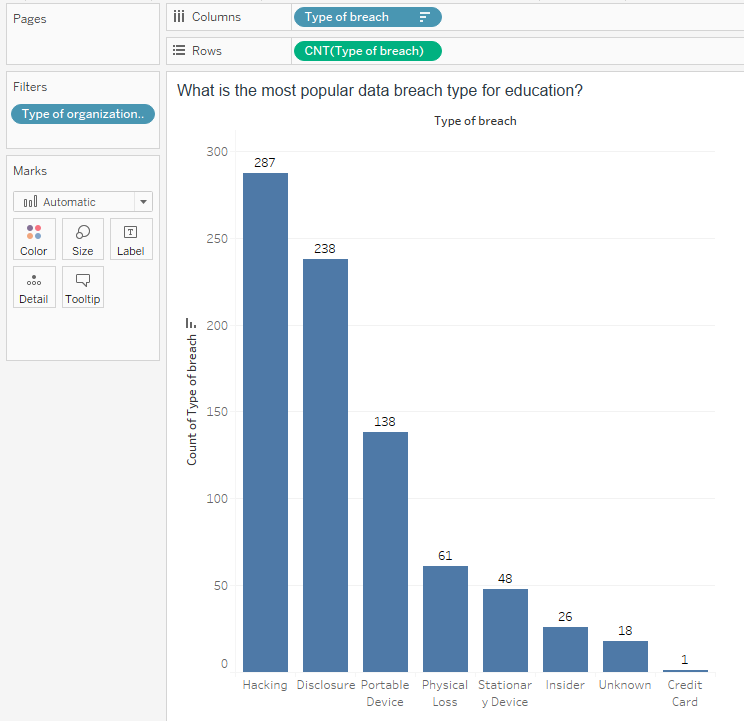

In [33]:
Image("img/viz/Q4.2.png")

4.3 What is the most popular data breach type for medical organizations?

Physical Loss

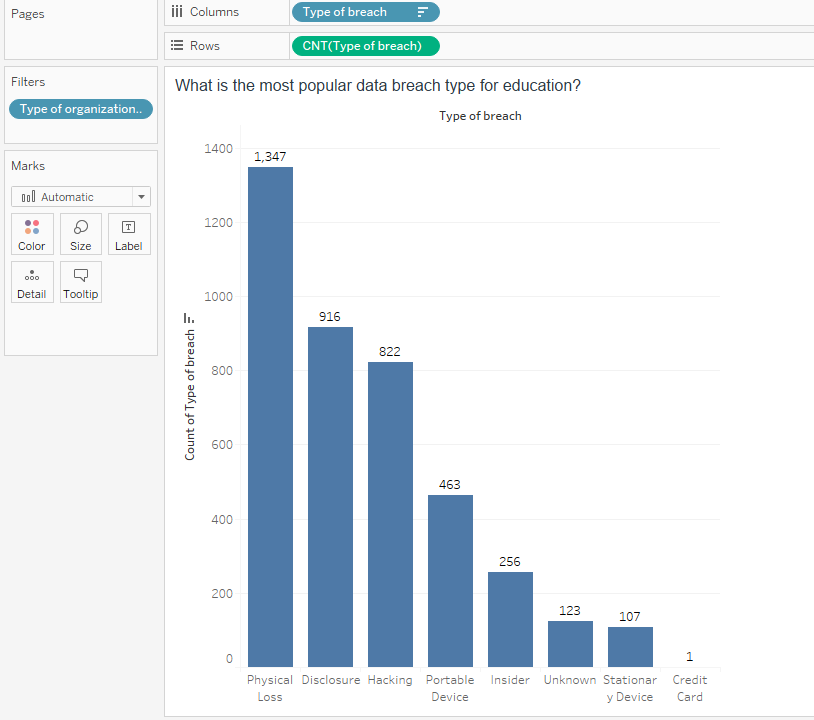

In [34]:
Image("img/viz/Q4.3.png")

5.1 Which state is more vulnerable to “Hackers”?

California

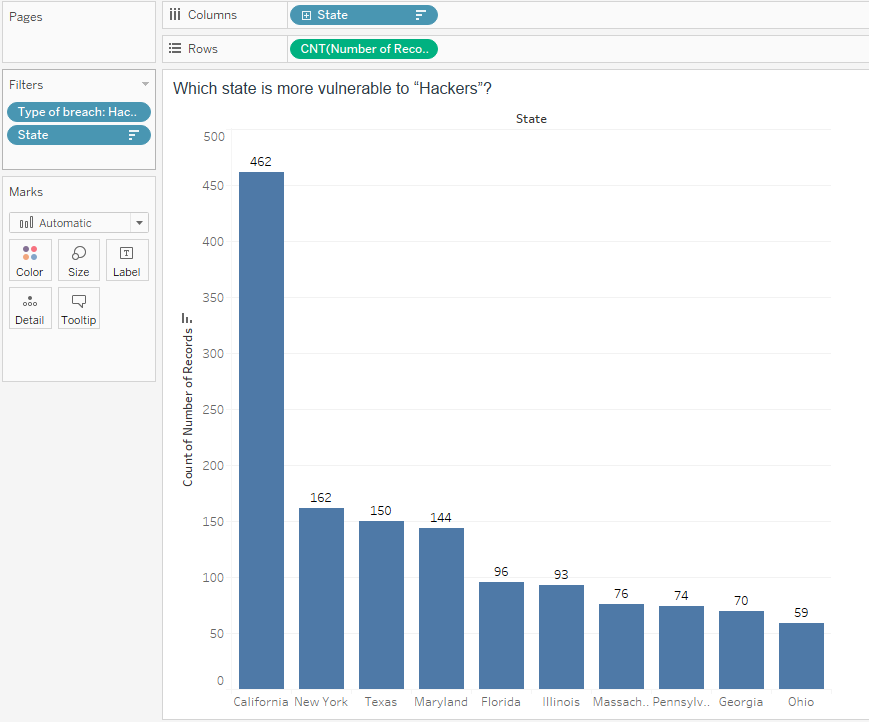

In [35]:
Image("img/viz/Q5.1.png")

5.2 Which state is more vulnerable to “CARD”?

California

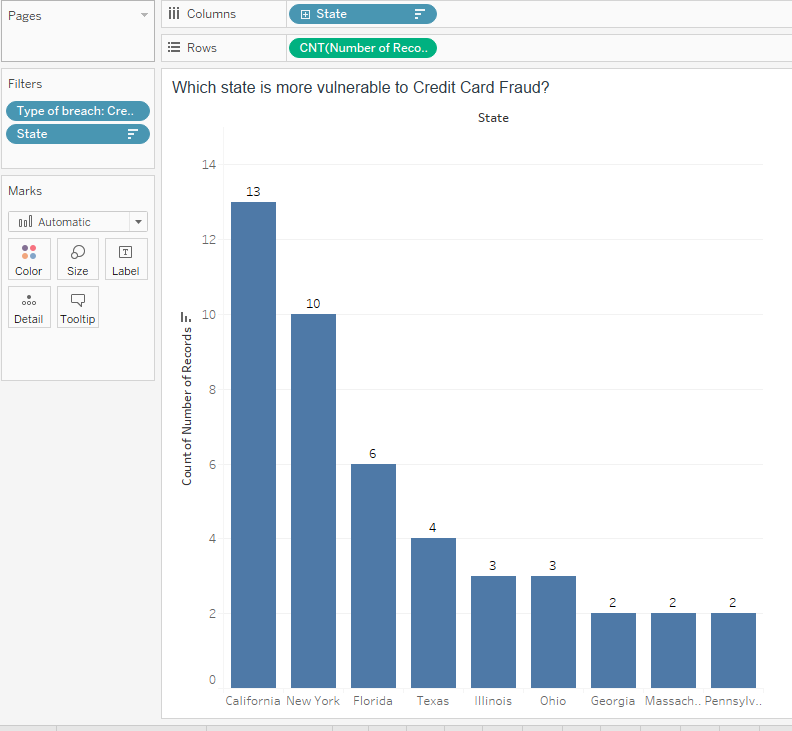

In [36]:
Image("img/viz/Q5.2.png")

6.2 How many breaches per year?

See Chart Below.

6.3 Is there any trend in data breaches over time (between 2005 and 2017)?

The trend is cleary positively sloped, meaning more breaches happened in the years closer to 2017 vs 2005.

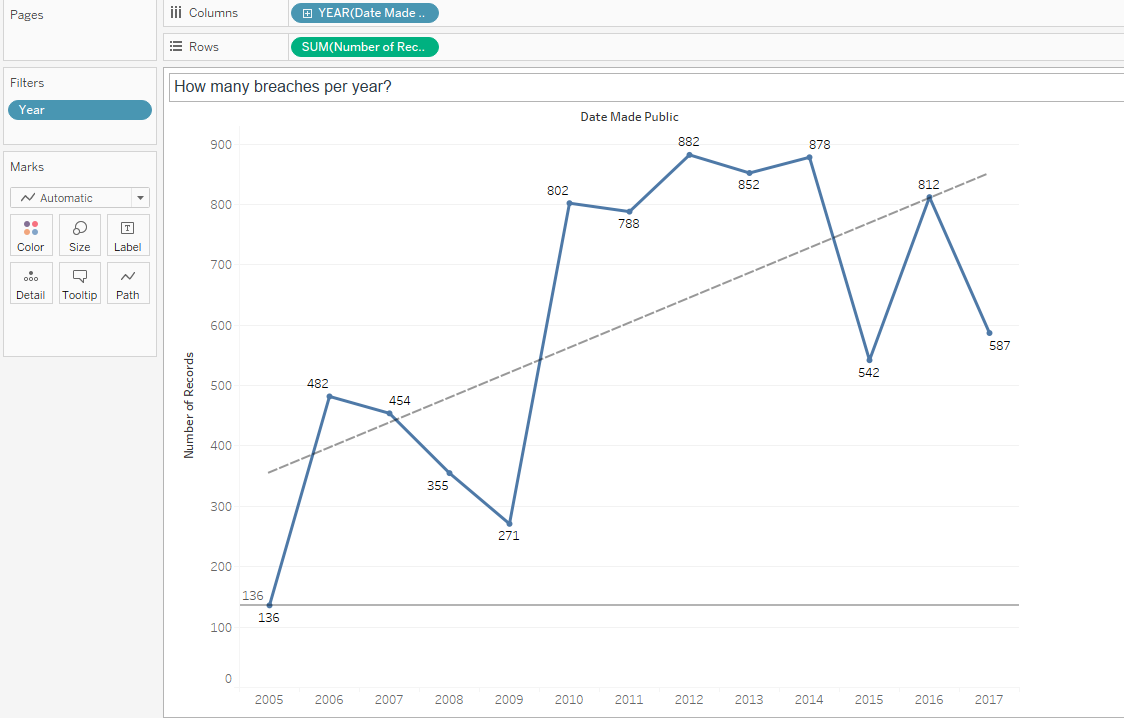

In [37]:
Image("img/viz/Q6.1.2.3.png")

7.2 Any data breach type in increase over time?

Hacking, Disclosure are rising over time.  (See Chart Below)

7.3  Any data breach type declining over time?

Portable and Stationary devices are in decline.

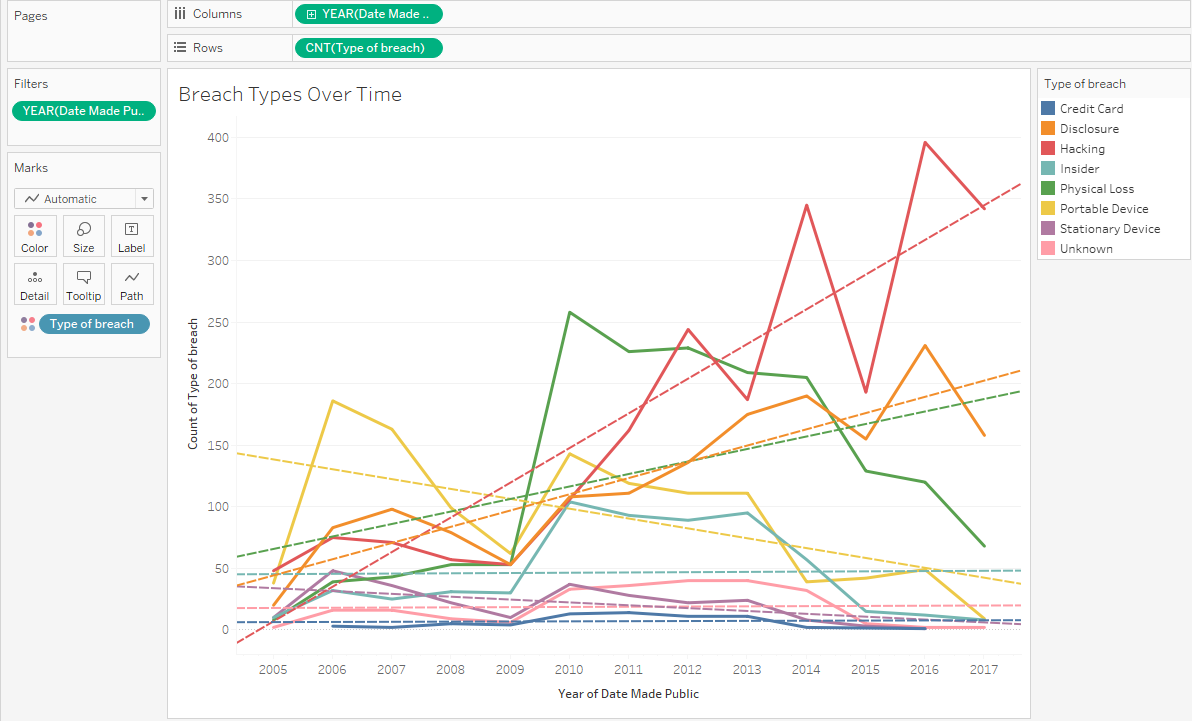

In [38]:
Image("img/viz/Q7.2.3.png")

8.1 How many organizations (“company”) have multiple data breaches (more than one data breach between 2005 and 2017)?

1171 Different organizations had more than 1 breach over the time.  (see the highlight at the bottom)

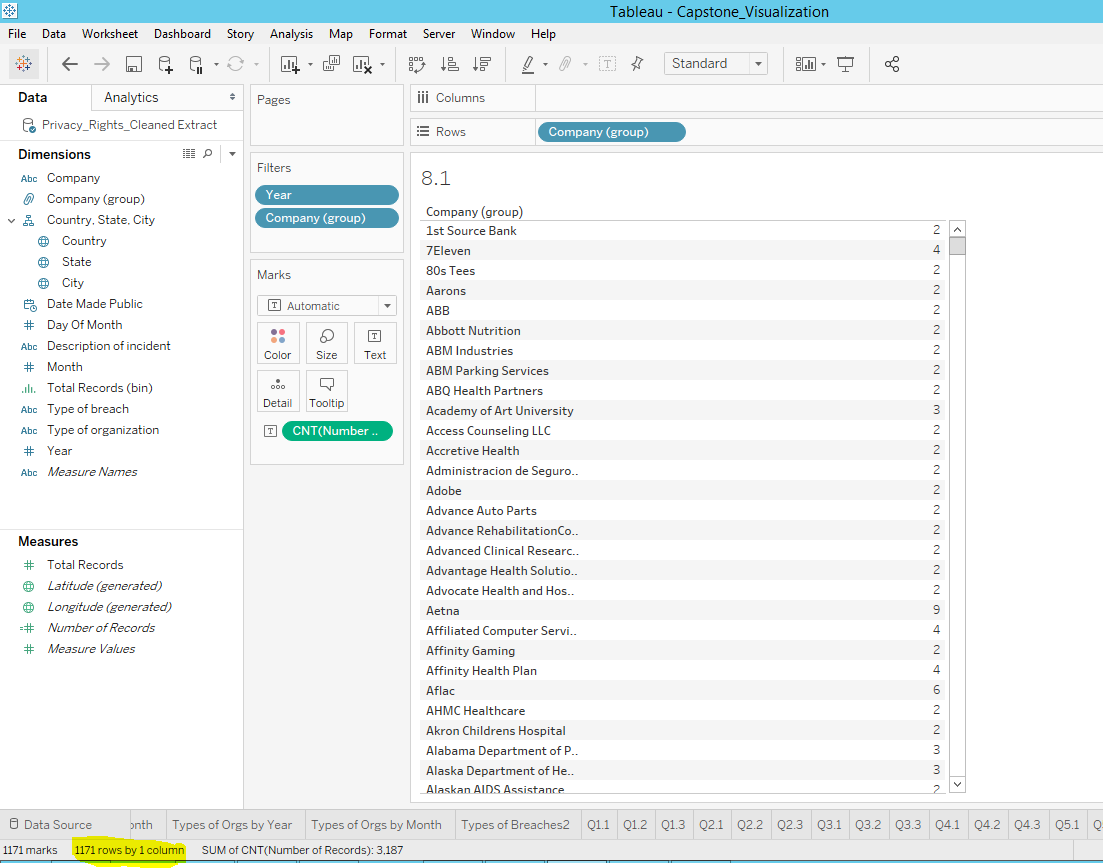

In [39]:
Image("img/viz/Q8.1.png")

8.2  What organization types are more likely to experience multiple data breaches (more than one data breach between 2005 and 2017) than other organization types?

Medical Providers, Educations and Finance or Insurance.

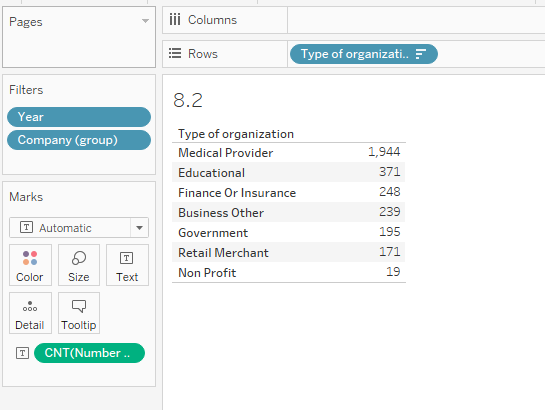

In [40]:
Image("img/viz/Q8.2.png")

### Part II Statistical  Analysis

In [41]:
# import packages
import csv
import re
import math 
import pandas as pd

In [42]:
# load data
Data_Breaches = []

openfile = open("Datasets/Cleaned/Privacy_Rights_Cleaned.csv", "rb")
r = csv.reader(openfile)

for i in r:
    Data_Breaches.append(i)
openfile.close()

In [43]:
# check the number of records in the dataset

print "There are " + str(len(Data_Breaches)) +" records in the dataset."

There are 8149 records in the dataset.


In [44]:
#convert to pandas    
Data_Breaches_DF = pd.DataFrame(Data_Breaches)

#set column names
Data_Breaches_DF.columns = ['Company','Year','Month','Day of Month','City','State', 'Country','Data_Public', 'Breach_Type','Org_Type','Total_Records','Description']
           
#set total_records to float datatype
Data_Breaches_DF['Total_Records'] = Data_Breaches_DF.Total_Records.astype(float)
    
#check data
#Data_Breaches_DF.head(5)

#### Hypothesis  Testing

#### 1. Hypothosis:  Unintended Disclosures and Hacking are equal in harm (number of total records affected)  
Alpha was not given and assumed to be 0.05

H0: (Mean of Total Records of breaches from Unintended Disclosures) - (Mean of Total Records of breaches from Hacking) = 0

Ha: (Mean of Total Records of breaches from Unintended Disclosures) - (Mean of Total Records of breaches from Hacking) != 0

z critical value of 1.960 (from table, 0.05 /2)

In [45]:
#hacking information

#select only hacking records
Data_Breaches_DF_Hacking = Data_Breaches_DF.loc[Data_Breaches_DF['Breach_Type'] == 'Hacking']

#get the mean of the total records column
Hacking_Harm_Mean = Data_Breaches_DF_Hacking['Total_Records'].mean()

#get the standard deviation of the total records column
Hacking_Harm_Std = Data_Breaches_DF_Hacking['Total_Records'].std()

#get record count
Hacking_Harm_Ct = Data_Breaches_DF_Hacking['Total_Records'].count()

In [46]:
#Unintended Disclosure information

#select only UD records
Data_Breaches_DF_UD = Data_Breaches_DF.loc[Data_Breaches_DF['Breach_Type'] == 'Disclosure']

#get the mean of the total records column
UD_Harm_Mean = Data_Breaches_DF_UD['Total_Records'].mean()

#get the standard deviation of the total records column
UD_Harm_Std = Data_Breaches_DF_UD['Total_Records'].std()

#get record count
UD_Harm_Ct = Data_Breaches_DF_UD['Total_Records'].count()

In [47]:
Z_Stat = abs((Hacking_Harm_Mean - UD_Harm_Mean) / math.sqrt((Hacking_Harm_Std **2 /Hacking_Harm_Ct) + (UD_Harm_Std **2 /UD_Harm_Ct)))

In [48]:
Z_Stat

1.2512713653752465

In [49]:
# test
Z_Crit_Value = 1.960

if (Z_Stat > Z_Crit_Value):
    print "Reject Null Hypothosis"
else:
    print "Accept Alternative Hypothosis"
    

Accept Alternative Hypothosis


#### Conclusion:
  We accept the hypothesis that the type data breach types Hacking and Unintended Disclosure are <b>NOT</b> equal in harm caused in terms of the number of records affected. This is proof that both hacking and unintended disclosures can cause different harm  levels to organizations.

#### 2. Hypothosis:  All data breach types are equal in harm (number of total records affected)  
Alpha was not given and assumed to be 0.05

H0: Means of all breach types in terms of total records affected are the same.

Ha: Atleast one breach type mean is different.

In [50]:
# imports for ANOVA from statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [51]:
#compute ANOVA table
mod = ols('Total_Records ~ Breach_Type', data=Data_Breaches_DF).fit()
anova_table = sm.stats.anova_lm(mod,typ=2)
print (anova_table)

                   sum_sq      df         F    PR(>F)
Breach_Type  1.434882e+16     7.0  1.307229  0.242185
Residual     1.276569e+19  8141.0       NaN       NaN


#### Conclusion:
At the 0.05 signifigance level we do not have enough evidence to reject the null hypothosis that the means are all equal.  P-value 0.24 > 0.05.  This means at that the means in terms of the total records, the harm caused by each breach type is not statistically different.

#### Statiscal Analysis additional Question
Which type of data breach tends to cause the most harm (the number of records affected) to organizations?

Shown here are the averages of Total Records by Breach Type.  Hacking and Unintended Disclosure are the highest.

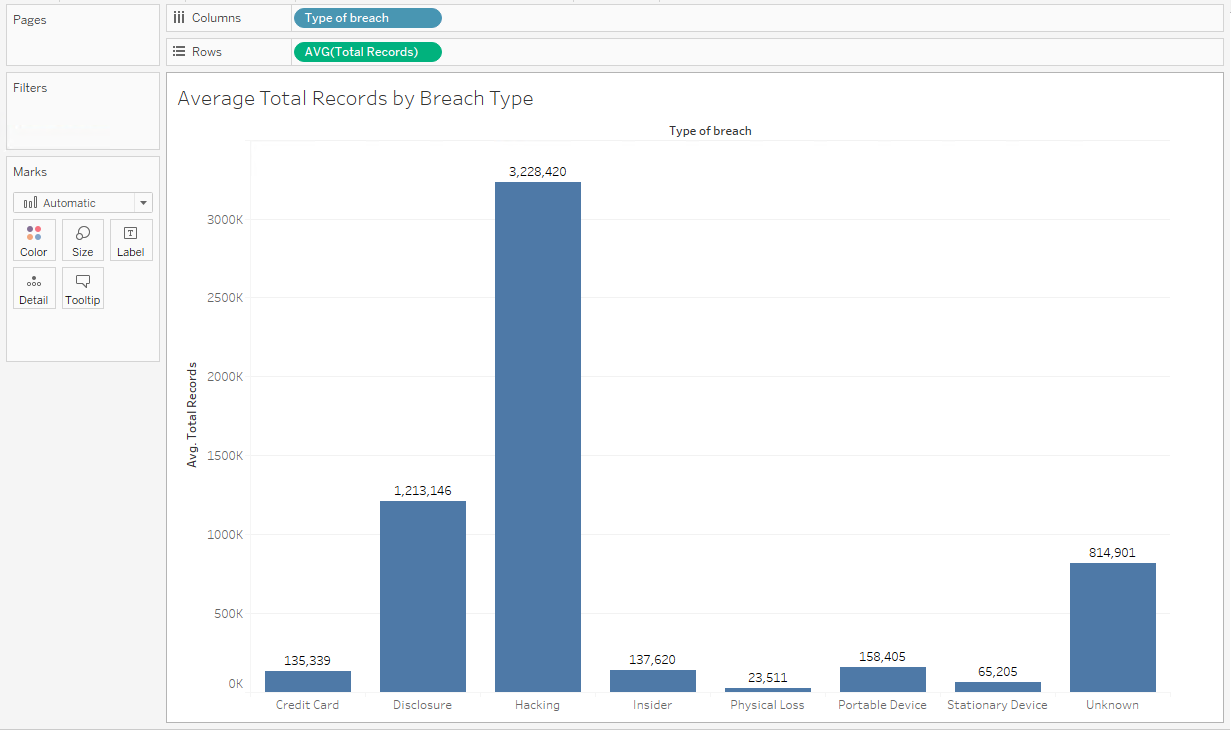

In [52]:
Image("img/stat/#3_graph.png")

### Part III Unsupervised Machine Learning

Additonal details of the modeling process can be found in my modeling jupyter notebook. https://github.com/lyte99/KSU-Capstone/blob/master/Modeling_Enhancement.ipynb

#### Topic Modeling
Using the LDA model, I created 8 topics using the "Description of Incident" field.  The data was first cleaned before being processed.  I found that using 8 topics was approximately the correct amount for the dataset.


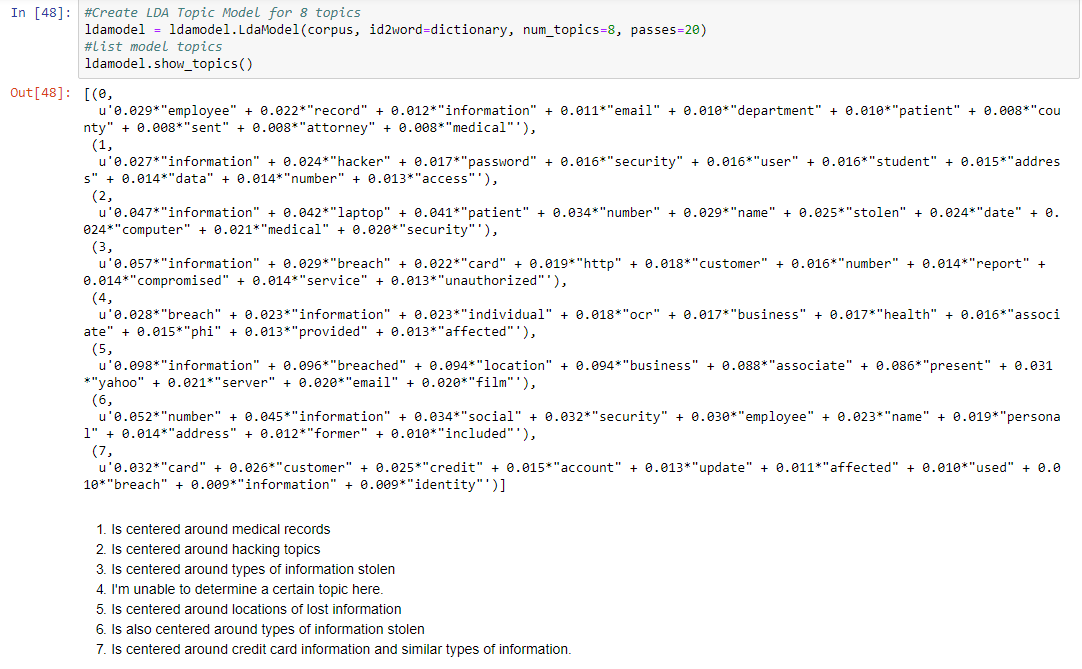

In [53]:
Image("img/Final/Topic_Modeling.png")

### Part IV Supervised Machine Learning

#### Classifier Modeling

I used Azure Machine Learning Studio to create two classifier models, using the "Description Of Incident" field. One predicts the type of breach and the other the type of organization.

Companies might use this model to predict what type of breach they might have given a simulated scenario.  Consulting firms could also use these models to predict what type of organizations might be particularly vulnerable to a give scenario.


This is the model for predicting the type of breach.  Multiple models were tested but ultimately Multiclass Decision Forrest was selected.  This is the evauation results of that model.  In my opinion, the model is overfit but the accuracy of 54% is quite good for only using one column of text.

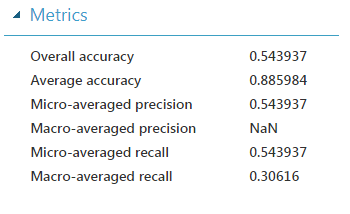

In [54]:
Image("img/Final/Type_of_breach_metrics1.png")

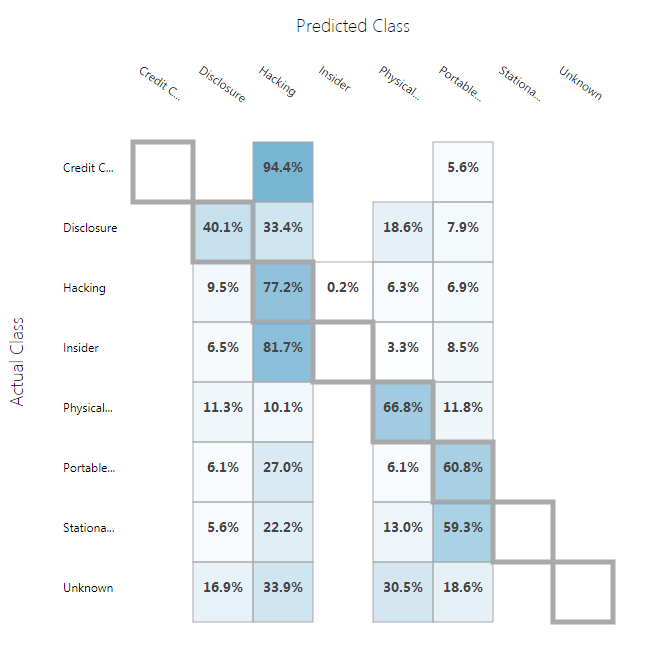

In [55]:
Image("img/Final/Type_of_breach_metrics2.png")

This is the model for predicting the type of organization.  Again, multiple models were tested but ultimately Multiclass Neural Network was selected.  This is the evauation results of that model.  In my opinion, this model is alo overfit but the accuracy of 60% is very good given the single input.

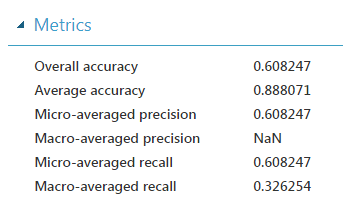

In [56]:
Image("img/Final/Type_of_org_metrics1.png")

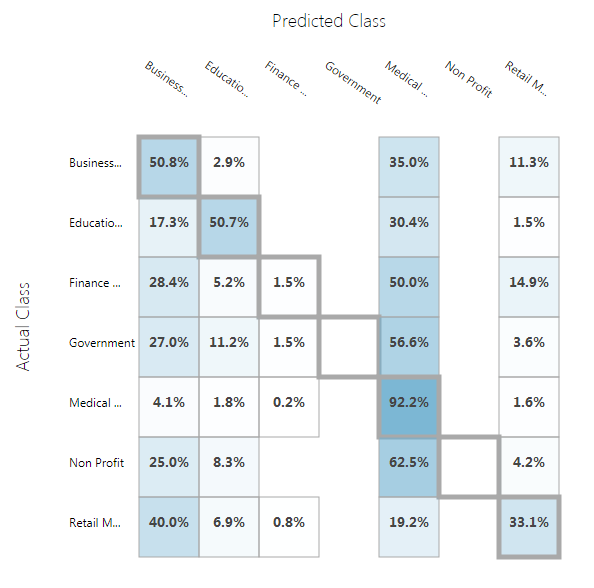

In [57]:
Image("img/Final/Type_of_org_metrics2.png")

## Overall Findings and insights

Data breaches are a problem.  For an institution they can be very expensive, lead to national bad PR headlines and cause loss of trust and confidence for customers, employees and the public in general.  Establishments need to take cyber security very seriously in today’s digital age and do what they can to reduce their risk on all fronts.  

This graph shows again the number of breaches by year.  The number of breaches had been at all-time highs in the last few years.  Organizations have started to spend more and pay more attention to cyber security recently and I think that is the reason for the more downward trend towards the end of the decade.  Hopefully 2018 and 2019 will again show lower incident number of breaches.

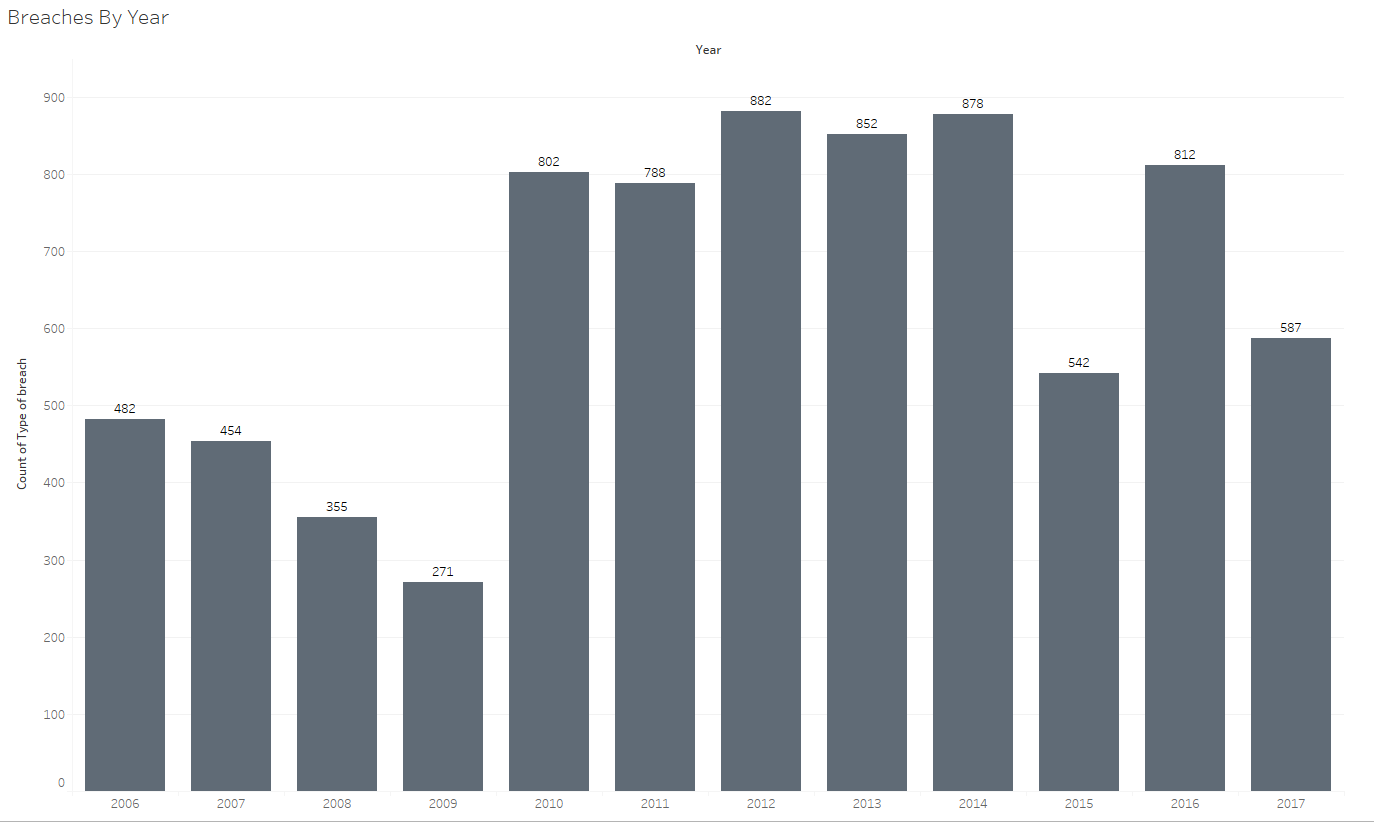

In [58]:
Image("img/final/Data_Breaches_By_Year.png")


2010 showed the highest amount of growth in breaches.  Healthcare was the biggest driving factor in that year.  Medical Providers when from a percentage of 19.5% of all breaches in 2009 to 47.6% in 2010.  This is probably largely imparted to the U.S. having major healthcare legislation the government’s Affordable Healthcare Act took affect that year and helped drive digitization of medical records. Medical providers remain the largest affected organization type to the current day. 

Retailers were also had large increases in the early part of the decade but after years of bad press and consumer pushback they have done a good job of reducing their number of breaches.  This is probably in part to better credit card protections from the major providers.

As of late, Business Other has begun to increase, that is a broad category so it’s difficult to interpret exactly what’s occurring there.

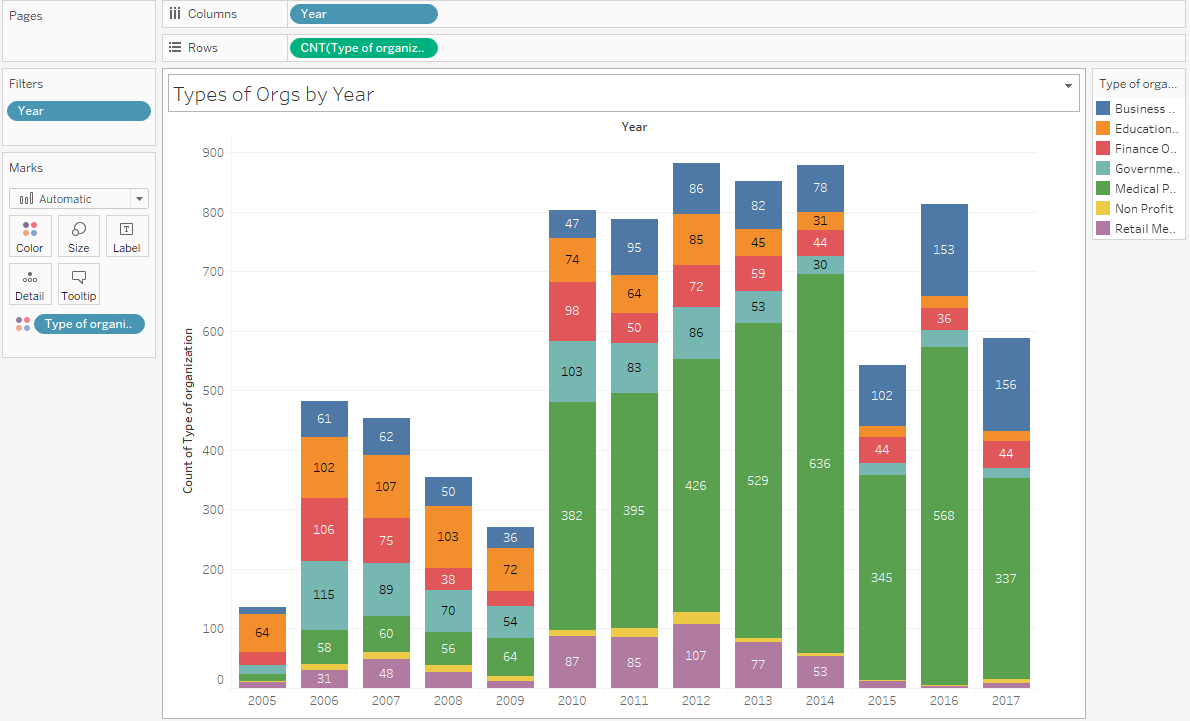

In [59]:
Image("img/viz/Breaches_By_Org_Stacked.png")

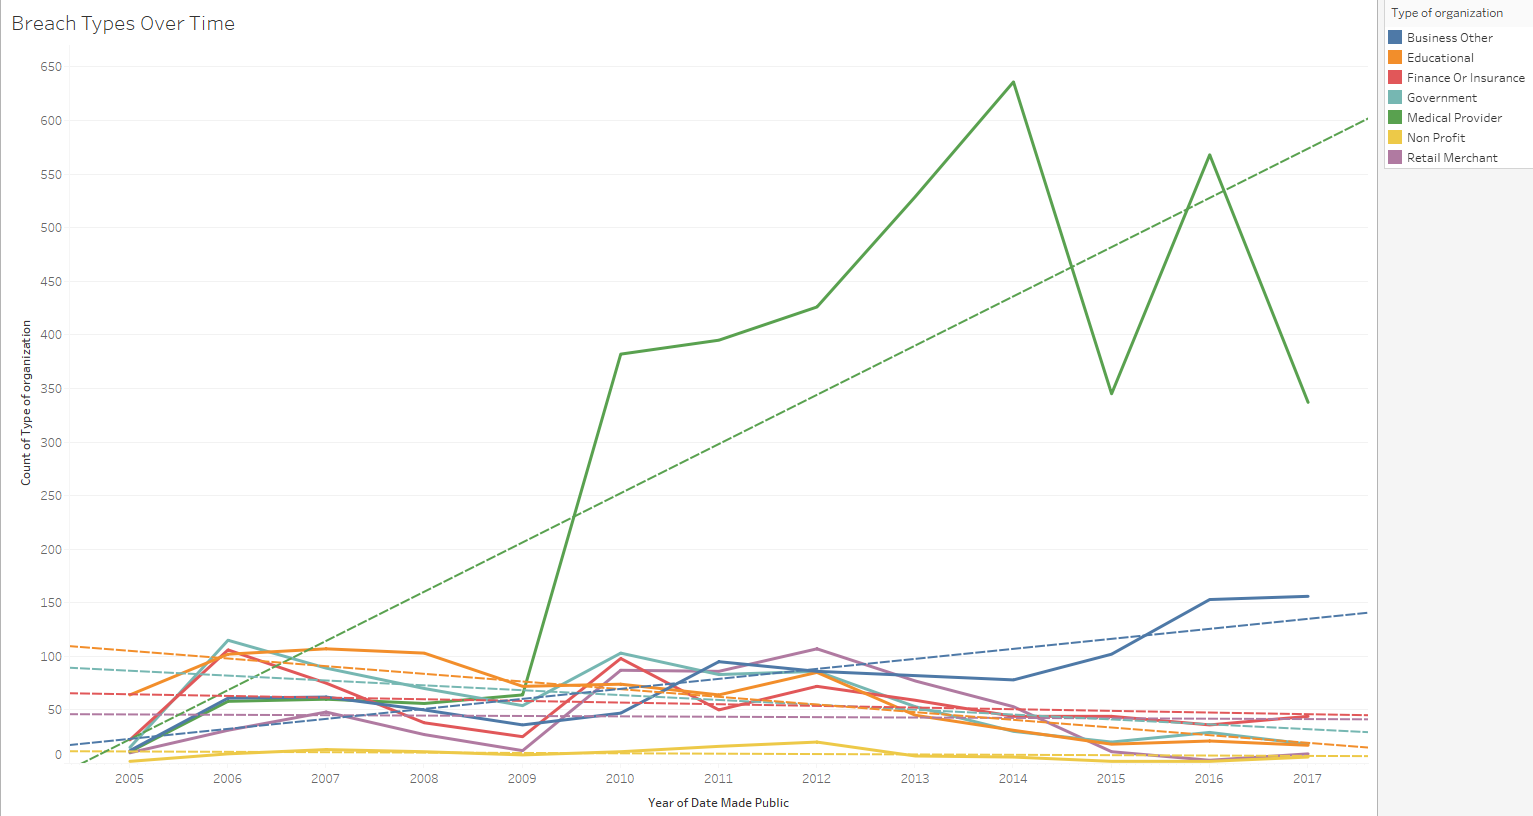

In [60]:
Image("img/final/Types_Of_Orgs_By_Year.PNG")

This graph shows what he particular industries should focus on.

* Medical Providers: Physical loss, Disclosure and Hacking
* Business Other: Hacking
* Educational: Disclosure and Hacking
* Finance: Hacking and Portable Devices
* Government: Disclosure, Hacking and Portable Devices
* Non-Profit: Hacking and Portable Devices:
* Retail:  Hacking


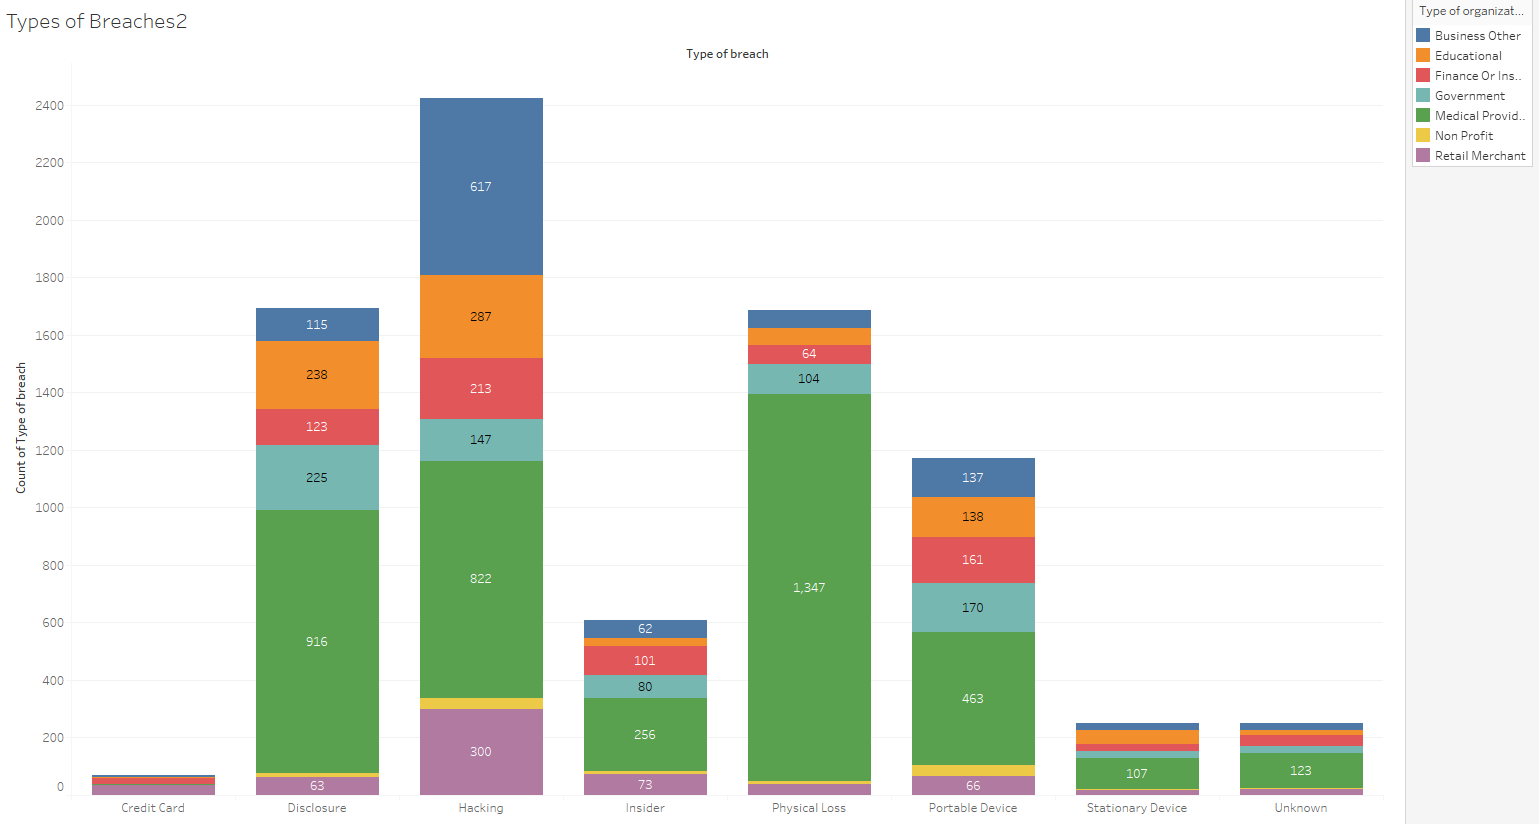

In [61]:
Image("img/final/Type_Of_Breaches_2.PNG")

This trend char shows the trend over time of the different types of breaches.

Hacking and disclosure are on a steep rise.  Hacking has become more prevalent with increasingly sophisticated malware, rasonmware and tools.  Disclosure is particularly concerning to me, this is because this is just people mishandling information.  I’m not sure of the exact cause of the rise but I would hope this could be easily fixed with better training, policies and procedures.

Portable and stationary devices are on the downward trend.  I think this is because of the rise of cloud computing and highspeed internet.  We no longer have as many of these devices and so it makes sense that they would be less predominant.  


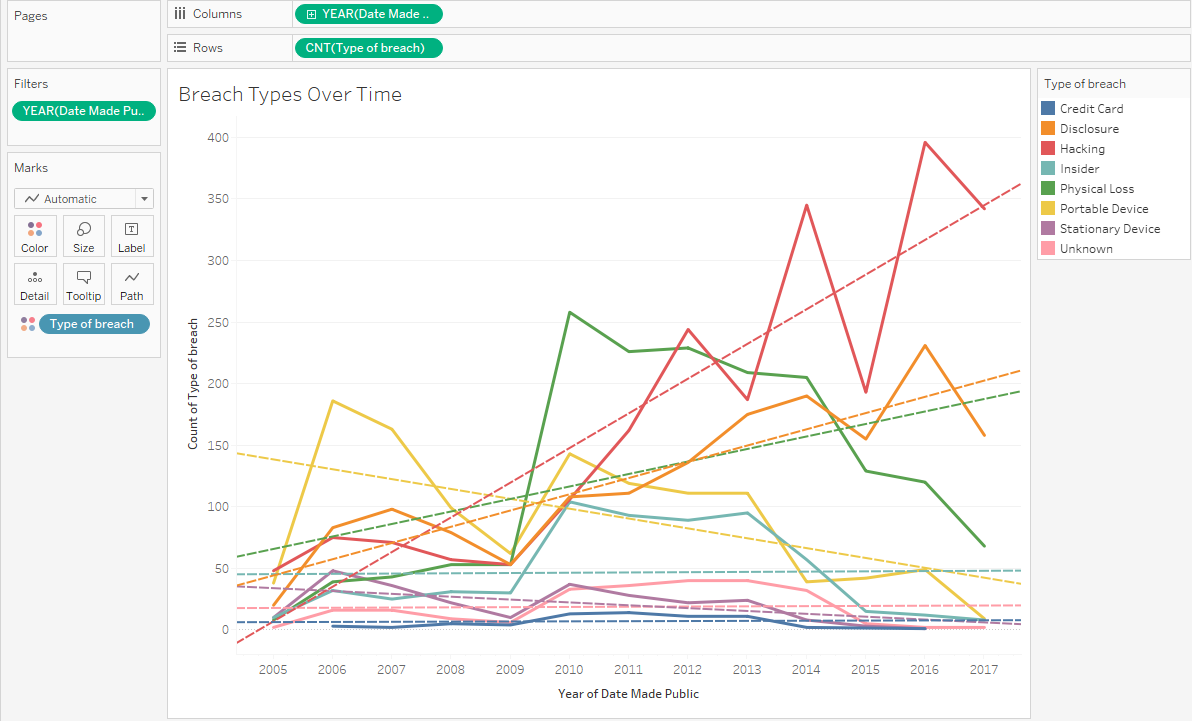

In [62]:
Image("img/viz/Q7.2.3.PNG")

## Kansas State Unviersity In The Dataset

Here were the two K-State breaches in the dataset. Scary because they contained social security information but the bright side is that the number of records included was relatively low.

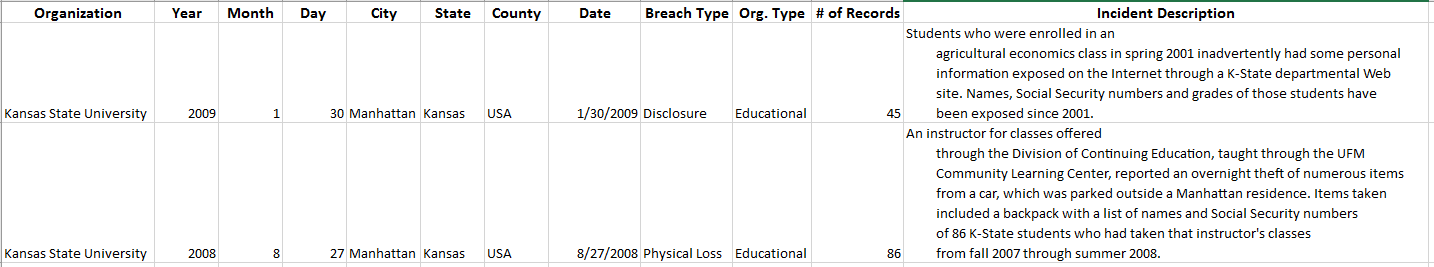

In [63]:
Image("img/final/KSU_Breaches.PNG")

## Personal Reflection

I’d like to take this opportunity to review the things I’ve learned in this capstone class.  I didn’t know what to expect going into this class but after completing it, I feel good about my future in data science.

Before taking this class, I’d never used many of the tools and methods I used on the project.  I started with cloud computing, I created an instance of a new server in the AWS cloud that I could easily install software on and use as my test bed without interrupting my personal computer.  I then used software I’d never used before, like Tableau Prep to do the data preparation phase and Tableau desktop for creating new visualizations.  I’d never done a multiclass classification machine learning algorithm before and while I had used Azure machine learning studio some, many of the nodes and methods I used on this project, I had never tried before.  

Being able to use these new tools and approaches means I’m better prepared for what lies ahead.

Go Wildcats!
